In [1]:
# Step 1: Install and Import H2O
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import seaborn as sns
h2o.init()

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 5.1 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3a0o4gbt
  JVM stdout: /tmp/tmp3a0o4gbt/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3a0o4gbt/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_unknownUser_6u9xy0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [2]:
from google.colab import files
uploaded = files.upload()


Saving swiggy_17.csv to swiggy_17.csv


In [3]:
data = h2o.import_file("swiggy_17.csv")
data.head()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
249,Indiranagar,Bangalore,Nh8,350,4,50,"Rajasthani,Gujarati,North Indian,Snacks,Desserts,Beverages,Thalis,Chaat",80 Feet Road,63
254,Indiranagar,Bangalore,Treat,800,4.5,100,"Mughlai,North Indian",100 Feet Road,56
258,Indiranagar,Bangalore,Chinita Real Mexican Food,1000,4.5,500,"Mexican,Beverages,Salads",Double Road,53
263,Koramangala,Bangalore,Cupcake Noggins - Cakespastries And Desserts,150,4.3,100,"Desserts,British,Bakery,Pizzas,Snacks",4Th Block,57
267,Domlur,Bangalore,Tea Brew,350,4.1,100,"American,Italian,Beverages,Continental,Chinese,Pastas,Pizzas,Fast Food",Double Road,57
308,Koramangala,Bangalore,Bangaliana,300,4,500,Bengali,7Th Block,57


In [4]:
data.col_names


['ID',
 'Area',
 'City',
 'Restaurant',
 'Price',
 'Avg ratings',
 'Total ratings',
 'Food type',
 'Address',
 'Delivery time']

In [13]:
target = 'Total ratings'
features = [col for col in data.col_names if col != target]

In [18]:
aml = H2OAutoML(max_models=5, seed=1)
aml.train(x=features, y=target, training_frame=data)


AutoML progress: |██████
05:06:37.504: GLM_1_AutoML_9_20250526_50555 [GLM def_1] failed: DistributedException from /127.0.0.1:54321: 'Java heap space', caused by java.lang.OutOfMemoryError: Java heap space

█████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/2
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [19]:
# Step 5: Show the Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_9_20250526_50555,372.719,138920,131.294,nan,138920
StackedEnsemble_BestOfFamily_1_AutoML_9_20250526_50555,372.973,139109,131.375,nan,139109
DRF_1_AutoML_9_20250526_50555,376.849,142015,121.101,0.985319,142015
GBM_2_AutoML_9_20250526_50555,378.401,143187,127.165,nan,143187
XGBoost_2_AutoML_9_20250526_50555,379.057,143684,138.025,nan,143684
GBM_1_AutoML_9_20250526_50555,382.492,146300,129.227,nan,146300
XGBoost_1_AutoML_9_20250526_50555,384.139,147562,147.631,nan,147562


/usr/local/lib/python3.11/dist-packages/h2o/estimators/stackedensemble.py:965: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


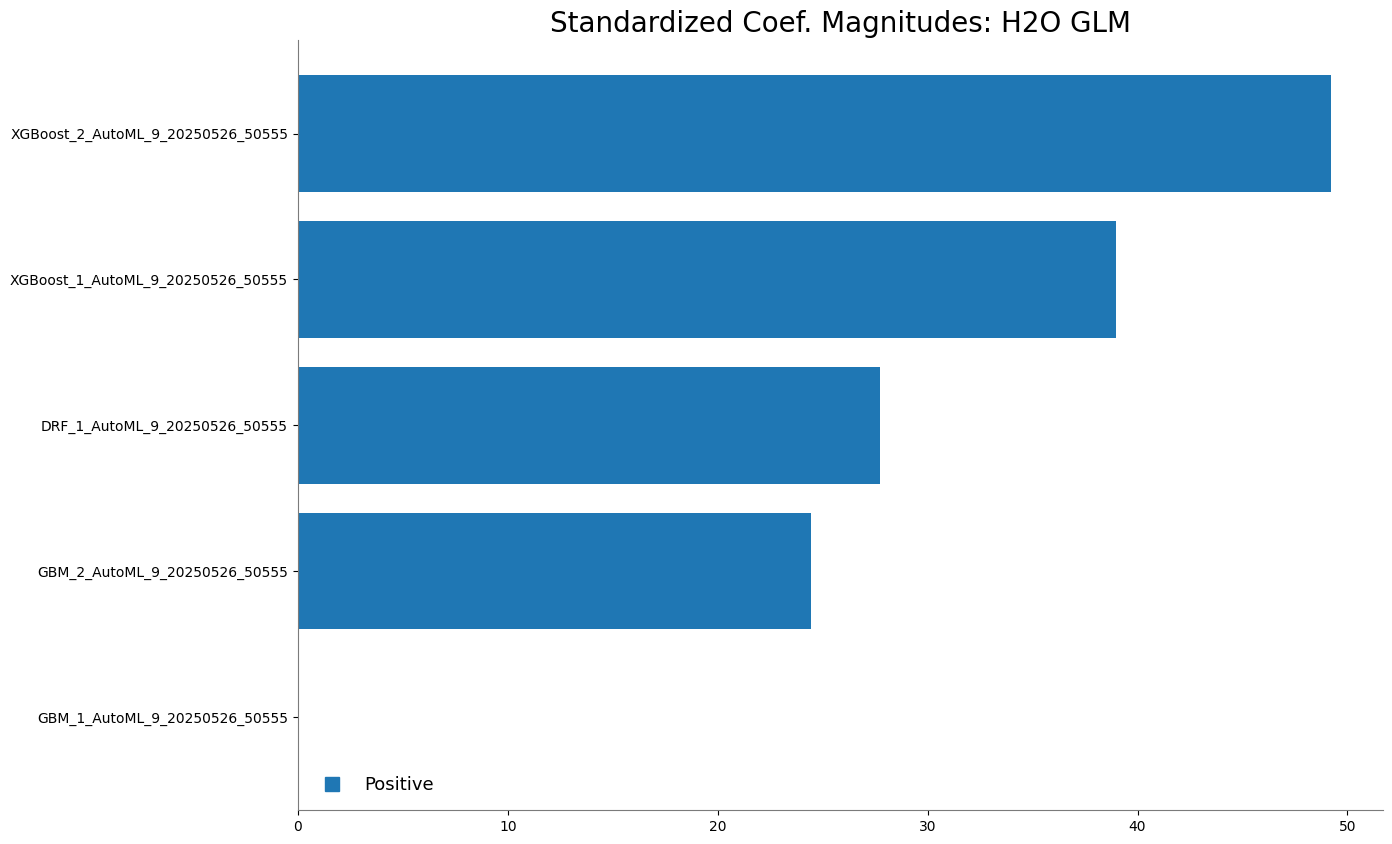

In [20]:
# Step 6: Visualize Ensemble Model Contributions
ensemble_model = aml.leader
metalearner = h2o.get_model(ensemble_model.metalearner()['name'])
metalearner.std_coef_plot()

In [21]:
predictions = aml.predict(data)
predictions.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
146.16
257.502
94.6161
243.724
189.92
309.395
292.363
173.203
243.182
302.478


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


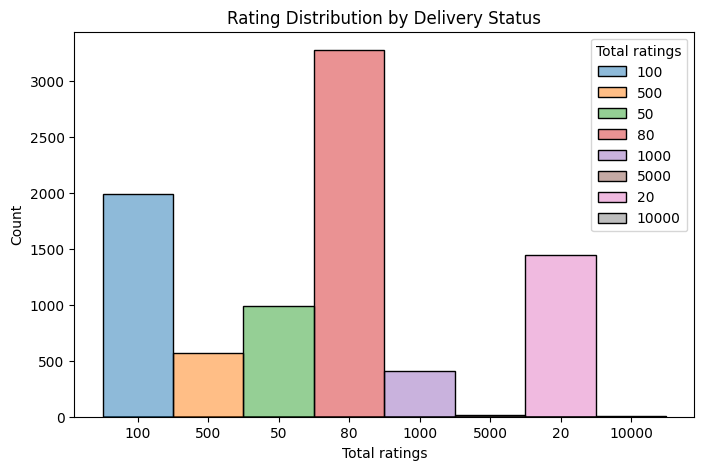

In [23]:
# Step 8: Visualizations for Dashboard
df = data.as_data_frame()
df[target] = df[target].astype(str)  # Ensure categorical for hue
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Total ratings', hue=target, kde=True)
plt.title('Rating Distribution by Delivery Status')
plt.show()

### Summary:
- This notebook loads and analyzes the Swiggy dataset using H2O AutoML.
- It trains multiple models and stacks them for higher accuracy.
- Visualizations are added for dashboard-like outputs.
- The leaderboard shows model performances.
- The ensemble metalearner plot explains model contributions.
